In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from collections import Counter
import operator
from textblob import TextBlob
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD




- In this task we will load Consumer_complaints.csv into a dataframe using pandas and explore the column Consumer Complaint Narrative.

- Load the dataset from 'path'(given) using the read_csv() method from pandas and store it in 'full_data'.

- Subset the dataframe 'full_data' to only include "Consumer complaint narrative" and "Product" and store this dataframe subset in 'data'

- Drop all the rows with null values in data using the dropna() method and inplace=True.

- Rename the column "Consumer compliant narrative" to "X" and "Product" to "y" by assigning ["X","y"] to data.columns

- Print out the value at index 1 of the "X" field to take a look.

In [2]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/topic_modelling_customer_complaint.csv'

In [3]:
full_data = pd.read_csv(path)

data = full_data[['Consumer complaint narrative', 'Product']]

data.isna().sum(), data.shape

data.dropna(inplace=True)

data.columns=['X', 'y']

data['X'][1]

/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


'When my loan was switched over to Navient i was never told that i had a deliquint balance because with XXXX i did not. When going to purchase a vehicle i discovered my credit score had been dropped from the XXXX into the XXXX. I have been faithful at paying my student loan. I was told that Navient was the company i had delinquency with. I contacted Navient to resolve this issue you and kept being told to just contact the credit bureaus and expalin the situation and maybe they could help me. I was so angry that i just hurried and paid the balance off and then after tried to dispute the delinquency with the credit bureaus. I have had so much trouble bringing my credit score back up.'

<h3>Bag of Words creation</h3>

- In this task, we will try to do the basic NLP operations of tokenizing, removing stop words and lemmatizing on our data. We will also try to create a list of most frequent words

- We have already removed the stopwords and the some part of code is already given to you

- Take the first 5 rows of the data and store them in variable first_five_complaints,

- Convert first_five_complaints to lowercase and store them to a list called 'BoW'.

- Tokenize each sentence of the list 'BoW' into constituent words using "word_tokenize()" and store it back into the list 'Bow'. (Hint: Instead of a loop you can also use list comprehension)

- Flatten 'BoW' by writing [item for sublist in BoW for item in sublist]' and store it back into 'BoW'.

- Remove stop words (defined in the custom list) from the words in 'BoW' and store it back into 'BoW'

- Initialise a WordLemmatizer() object and store it in a variable called 'lemmatizer'.

- Lemmatize each word from 'Bow' using 'lemmatize()' method of 'lemmatizer' and store it back into 'BoW'

- Convert 'Counter(BoW)' into dictionary and save it in a variable called 'BoW_dict'.

- Sort 'BoW_dict' in descending order using "sorted()" function with the parameters BoW_dict.items(), key=operator.itemgetter(1), reverse=True. Store it in a variable called 'sorted_d'

- Print 'sorted_d' to check out the list of words with their frequency in descending order.

In [4]:
stopwords_set = set(stopwords.words('english'))
stopwords_set.add('xxxx')
custom = list(stopwords_set)+list(punctuation)+['``', "'s", "...", "n't"]

first_five_complaints = data.iloc[ 0 : 5, 0]

BoW = first_five_complaints.apply(lambda x : x.lower())

BoW = [word_tokenize(i) for i in BoW]
BoW = [item for sublist in BoW for item in sublist]

BoW = [x for x in BoW if x not in custom]

#BoW

lemmatizer = WordNetLemmatizer()

# BoW = BoW.map(lambda x : word_tokenize(x))

# BoW = BoW.map( lambda x : [i for i in x if i not in custom])

BoW = [lemmatizer.lemmatize(x) for x in BoW]

BoW_dict = Counter(BoW)

sorted_d = sorted(BoW_dict.items(), key=operator.itemgetter(1), reverse=True)

print(sorted_d)

[('payment', 12), ('closing', 12), ('account', 11), ('credit', 8), ('mortgage', 8), ('rate', 8), ('would', 8), ('bank', 7), ('fixed', 7), ('could', 6), ('property', 6), ('form', 6), ('loan', 5), ('told', 5), ('year', 5), ('day', 5), ('disclosure', 5), ('u', 5), ('score', 4), ('back', 4), ('bb', 4), ('amount', 4), ('30', 4), ('number', 4), ('received', 4), ('product', 4), ('checking', 4), ('decided', 4), ('letter', 4), ('--', 4), ('please', 4), ('close', 4), ('navient', 3), ('kept', 3), ('contact', 3), ('tried', 3), ('sign', 3), ('pay', 3), ('website', 3), ('bi-weekly', 3), ('customer', 3), ('set', 3), ('offer', 3), ('send', 3), ('understand', 3), ('asked', 3), ('3', 3), ('make', 3), ('like', 3), ('citizen', 3), ('arm', 3), ('30yr', 3), ('requested', 3), ('corrected', 3), ('right', 3), ('date', 3), ('email', 3), ('need', 3), ('address', 3), ('deposit', 3), ('increased', 3), ('balance', 2), ('going', 2), ('delinquency', 2), ('bureau', 2), ('help', 2), ('much', 2), ('program', 2), ('one',



<h3>Top Nouns</h3>

- Since Nouns are important in Topic Modeling process, we will try to figure out the top nouns from the bag of words we created in the last task.

- We have given you some pre excution code

- Join the previously created bag of words 'BoW' back into a string using "join()" method and store the result in 'BoW_joined'.

- Convert 'Bow_joined' into a textblob using \"TextBlob()\" method and store the result into 'blob'.

- Print out the "blob.tags" to look at the different tags associated with the words.

- Get the tags of all the words from 'BoW' using blob.tags and store the result in a variable called 'tags'

- From 'tags', extract the words which have "NN" tags and store them to a list called 'nouns'

- The top 10 words which have appeared most frequently are already stored into a list called 'top_words'

- Compare the two lists 'top_words' and 'nouns' and store the common elements between them in a new list called 'top_nouns'

- Print 'top_nouns' to see most commonly appearing nouns

In [5]:
#Extracting the top 10 words with their count
top_10 = sorted_d[:10]

#Storing only the top 10 words
top_words=[]
for x in top_10:
    top_words.append(x[0])


In [6]:
BoW_joined = ' '.join(BoW)

In [7]:
blob = TextBlob(BoW_joined)

In [8]:
print(blob.tags)

[('loan', 'NN'), ('switched', 'VBD'), ('navient', 'JJ'), ('never', 'RB'), ('told', 'VBD'), ('deliquint', 'NN'), ('balance', 'NN'), ('going', 'VBG'), ('purchase', 'NN'), ('vehicle', 'NN'), ('discovered', 'VBD'), ('credit', 'NN'), ('score', 'NN'), ('dropped', 'VBD'), ('faithful', 'JJ'), ('paying', 'VBG'), ('student', 'NN'), ('loan', 'NN'), ('told', 'VBD'), ('navient', 'JJ'), ('company', 'NN'), ('delinquency', 'NN'), ('contacted', 'VBD'), ('navient', 'JJ'), ('resolve', 'NN'), ('issue', 'NN'), ('kept', 'VBD'), ('told', 'VBN'), ('contact', 'NN'), ('credit', 'NN'), ('bureau', 'NN'), ('expalin', 'JJ'), ('situation', 'NN'), ('maybe', 'RB'), ('could', 'MD'), ('help', 'VB'), ('angry', 'JJ'), ('hurried', 'VBN'), ('paid', 'VBN'), ('balance', 'NN'), ('tried', 'VBD'), ('dispute', 'JJ'), ('delinquency', 'NN'), ('credit', 'NN'), ('bureau', 'NN'), ('much', 'JJ'), ('trouble', 'NN'), ('bringing', 'VBG'), ('credit', 'NN'), ('score', 'NN'), ('back', 'RB'), ('tried', 'VBD'), ('sign', 'NN'), ('spending', 'NN

In [9]:
tags = blob.tags

In [10]:
nouns = [x[0] for x in tags if x[1] == 'NN']

In [11]:
noun_dict = dict(Counter(nouns))

In [12]:
noun_dict = sorted(noun_dict.items(), key=operator.itemgetter(1), reverse=True)

In [13]:
top_noun = set(top_words).intersection(set(nouns))

In [14]:
top_noun

{'account', 'bank', 'closing', 'credit', 'mortgage', 'payment', 'rate'}





<h3> LSA Modeling</h3>

- In this task, we will try to see how to use LSI on the entire dataset.

- A cleaned list called doc_clean containing data of X column is already given.

- Create a dictionary from 'doc_clean' using "corpora.Dictionary()" and store it in a variable called 'dictionary'

- Create a word corpus of 'dictionary' using "doc2bow()" method and store the result in a variable called 'doc_term_matrix'

- Initialise the LSI model "LsiModel()" with the parameters corpus=doc_term_matrix, num_topics=5, id2word=dictionary and store it in lsimodel.

- Print(Use pprint()) the 5 topics using "print_topics()" method of lsimodel and have a look at it.

In [15]:
stop = stopwords_set
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# Function to lemmatize and remove the stopwords
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Creating a list of documents from the complaints column
list_of_docs = data["X"].tolist()

# Implementing the fuction for all the complaints of list_of_docs
doc_clean = [clean(doc).split() for doc in list_of_docs]
print(doc_clean[ : 2])

[['loan', 'switched', 'navient', 'never', 'told', 'deliquint', 'balance', 'not', 'going', 'purchase', 'vehicle', 'discovered', 'credit', 'score', 'dropped', 'xxxx', 'faithful', 'paying', 'student', 'loan', 'told', 'navient', 'company', 'delinquency', 'with', 'contacted', 'navient', 'resolve', 'issue', 'kept', 'told', 'contact', 'credit', 'bureau', 'expalin', 'situation', 'maybe', 'could', 'help', 'me', 'angry', 'hurried', 'paid', 'balance', 'tried', 'dispute', 'delinquency', 'credit', 'bureau', 'much', 'trouble', 'bringing', 'credit', 'score', 'back', 'up'], ['tried', 'sign', 'spending', 'monitoring', 'program', 'capital', 'one', 'let', 'access', 'account']]


In [16]:
dictionary = corpora.Dictionary(documents=doc_clean)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=5, id2word=dictionary)

pprint(lsimodel.print_topics())

[(0,
  '0.351*"xxxxxxxx" + 0.311*"credit" + 0.308*"xxxx" + 0.293*"account" + '
  '0.193*"payment" + 0.142*"report" + 0.139*"bank" + 0.132*"would" + '
  '0.132*"card" + 0.116*"information"'),
 (1,
  '-0.455*"credit" + 0.345*"xxxxxxxx" + -0.298*"consumer" + -0.240*"debt" + '
  '-0.234*"report" + -0.225*"agency" + -0.209*"information" + '
  '-0.204*"reporting" + -0.160*"collection" + 0.137*"bank"'),
 (2,
  '0.355*"consumer" + -0.350*"credit" + -0.277*"card" + 0.203*"law" + '
  '0.186*"criminal" + 0.178*"property" + 0.170*"information" + '
  '0.164*"mortgage" + 0.164*"agency" + 0.149*"court"'),
 (3,
  '0.709*"xxxxxxxx" + -0.391*"payment" + -0.252*"loan" + -0.133*"would" + '
  '-0.107*"told" + 0.102*"usaa" + 0.101*"inquiry" + -0.088*"pay" + -0.080*"nt" '
  '+ 0.077*"report"'),
 (4,
  '0.377*"consumer" + -0.290*"credit" + 0.258*"information" + 0.206*"payment" '
  '+ -0.179*"criminal" + -0.163*"law" + -0.161*"card" + 0.155*"loan" + '
  '0.148*"xxxxxxxx" + -0.148*"property"')]


<h3>LDA Modelling</h3>

- A cleaned list called doc_clean containing data of X column is already given.

- Create a dictionary from 'doc_clean' using "corpora.Dictionary()" and store it in a variable called 'dictionary'

- Create a word corpus of 'dictionary' using "doc2bow()" method and store the result in a variable called 'doc_term_matrix'

- Initialise the LDA model "LdaModel()" with the parameters corpus=doc_term_matrix, num_topics=5, id2word=dictionary, passes=30, random_state=20 and store it in ldamodel.

- Print(Use pprint()) the 5 topics using "print_topics()" method of ldamodel and have a look at it.

In [17]:
dictionary = corpora.Dictionary(documents=doc_clean)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=5, id2word=dictionary, passes=30, random_state=20)

pprint(ldamodel.print_topics())

[(0,
  '0.044*"credit" + 0.029*"report" + 0.029*"account" + 0.019*"xxxx" + '
  '0.018*"information" + 0.016*"xxxxxxxx" + 0.014*"reporting" + '
  '0.011*"company" + 0.009*"debt" + 0.009*"agency"'),
 (1,
  '0.020*"account" + 0.016*"xxxx" + 0.015*"card" + 0.014*"credit" + '
  '0.011*"bank" + 0.011*"xxxxxxxx" + 0.010*"call" + 0.009*"would" + '
  '0.009*"called" + 0.008*"told"'),
 (2,
  '0.034*"debt" + 0.011*"collection" + 0.011*"company" + 0.010*"xxxx" + '
  '0.009*"law" + 0.008*"letter" + 0.008*"criminal" + 0.007*"never" + '
  '0.006*"court" + 0.006*"property"'),
 (3,
  '0.013*"debt" + 0.013*"collection" + 0.010*"credit" + 0.010*"agency" + '
  '0.006*"xxxxxxxx" + 0.006*"year" + 0.006*"right" + 0.006*"xxxx" + '
  '0.005*"letter" + 0.005*"court"'),
 (4,
  '0.028*"payment" + 0.025*"loan" + 0.016*"xxxxxxxx" + 0.010*"mortgage" + '
  '0.010*"xxxx" + 0.009*"would" + 0.008*"month" + 0.007*"year" + 0.007*"time" '
  '+ 0.006*"pay"')]






<h3>Perplexity and Coherence</h3>

- In this task, we will try to find the perplexity and coherence of the LDA model we created in the previous task

 * Find the perplexity of the model using "log_perplexity()" method of ldamodel and passing the parameter 'doc_term_matrix'. Store it in a varialble called 'perplexity_lda'.

 * Create a coherence object using "CoherenceModel()" with the parameters model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v' and store it in 'coherence_model_lda'.

 * Find the coherence of the model using "get_coherence()" method of coherence_model_lda and store it in a varialble called 'coherence_lda'.

In [18]:
perplexity_lda = ldamodel.log_perplexity(chunk=doc_term_matrix)

coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()

/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:504: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:506: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


In [19]:
TextBlob('I am planning to visit Russia to watch the Football world cup').tags

[('I', 'PRP'),
 ('am', 'VBP'),
 ('planning', 'VBG'),
 ('to', 'TO'),
 ('visit', 'VB'),
 ('Russia', 'NNP'),
 ('to', 'TO'),
 ('watch', 'VB'),
 ('the', 'DT'),
 ('Football', 'NNP'),
 ('world', 'NN'),
 ('cup', 'NN')]






# Assessment

<h3>Load and preprocess data</h3>

- In this task you will be loading and preprocessing data. Preprocessing involves retaining only alphabets in the headlines.

- Instructions
    * Load the csv file using .read_csv() method of pandas. Pass arguments path, parse_dates=[0], infer_datetime_format=True apart from the file path location inside to have the column with dates in datetime format. Save it as data

    * The observations are randomly ordered which won't be helpful if one wants to find out trends in topics. So, sort these values by date ('publish_date) using .sort_values('publish_date', inplace=True) on data

    * Now remove all numbers from every headline using re.sub('[^a-zA-Z]', ' ',x). Use in on 'headline_text' column with the help of apply() method

    * Display the shape of data using .shape attribute

    * Display the first five rows using .head() method of pandas

In [20]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/New_Headline_Topic_Modeling_Assesment.csv'

In [21]:
data = pd.read_csv(path, parse_dates=[0],
    infer_datetime_format=True)

data.head()

data.sort_values(by='publish_date', inplace=True)

data['headline_text'] = data['headline_text'].apply(lambda x : re.sub('[^a-zA-Z]', ' ', x))

data.shape

data.head()

,publish_date,headline_text
286211,2003-02-19,police defend aboriginal tent embassy raid
180156,2003-02-19,talk of asian nuclear arms race unhelpful downer
233845,2003-02-19,taipans placing future in publics hands
170928,2003-02-19,most highly educated live in nsw wa
245529,2003-02-19,six palestinians killed in gaza incursion





<h3>Which is the most frequently occurring word in the document?</h3>
In order to get an idea of the topics, the most frequently occuring word in the entire corpus would be of great help. These frequently occuring words have a high probability of occuring in the topics and so lets visualize them

Instructions
- Initialize a CountVectorizer() object called vectorizer. Pass arguments stop_words='english' and max_features=30000

- Declare a new variable news which fits and transforms data['headline_text'] into a Bag-of-Words model with the .fit_transform() method of vectorizer object.

- Initialize an empty dictionary words which will store every unique word occuring in the corpus as keys and the number of times every word occurs across the corpus as values. Also, initialize a variable i and set its value as 0.

- Calculate the number of times every word/feature across the corpus. Save it as sums. Its shape should be (30000,) i.e. it should be a 1-D numpy ndarray. The variable i will iterate over sums in order to extract the value of a feature/word

- Iterate over every unique word over the list of all features/words in the Bag-of-Words model (vectorizer.get_feature_names() gives all unique words or all features in Bag-of-Words model). Set the key of news dictionary as that word and its corresponding value as sums[i] (i indicates the number of times that word occurs across the corpus); and then increment i by 1

- Find top 20 most occuring words by sorting news according to its values in descending order. Save it as a list named top_20

- Declare two list comprehensions top_20_words and top_20_values which stores the words and values respectively for every word in top_20 list

- Display using a barplot top_20_words on X-axes and top_20_values on Y-axes using seaborn's .barplot() method

- Display the plot using .show() method

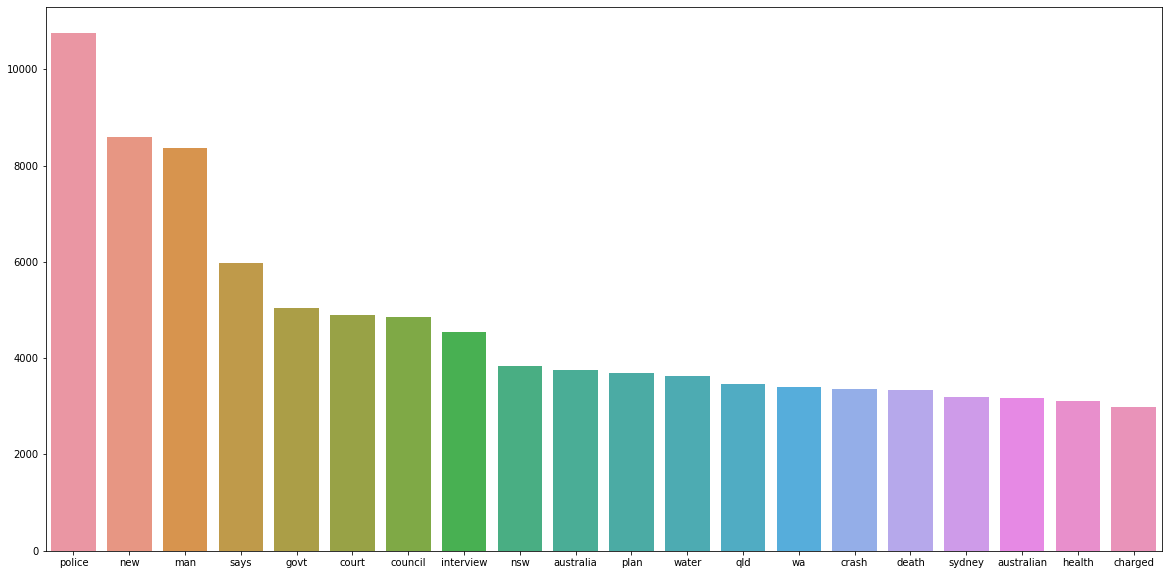

In [39]:
vectorizer = CountVectorizer(stop_words='english', max_features=30000)

news = vectorizer.fit_transform(data['headline_text'])

words = {}
i = 0

sums = np.array(np.sum(news, axis=0)).flatten()

sums.shape

for word in vectorizer.get_feature_names():
    words[word] = sums[i]
    i += 1

top_20 = sorted(words.items(), key=operator.itemgetter(1), reverse=True)[:20]

top_20_words = [word[0] for word in top_20]
top_20_values = [value[1] for value in top_20]
plt.figure(figsize=(20,10))
sns.barplot(top_20_words,top_20_values)
plt.show()




<h3>Topic Modelling with LSA</h3>
In the previous tasks you preprocessed data and also had a glimpse into possible words in your topics. Now use LSA (Latent Semantic Analysis) to assign topics to every headline. Since almost every word has some chance of getting assigned to a particular topic, you will be choosing only the 10 most important words for every topic

Instructions
- First decide on the number of topics. Take it as 5 and save it as n_topics

- Initialize a truncated SVD model using lsa_model = TruncatedSVD(n_components=n_topics, random_state=2)

- Use .fit_transform() method of lsa_model on news to decompose news. This step essentially assigns a topic to every headline and should be of the shape (number of headlines, number of topics). Save it as lsa_topic_matrix

- Initialize an empty dictionary topic_lsa which stores topic number as keys and values as the linear combination of words for the topic

- Use a for loop to iterate over every topic and its index using for i, topic in enumerate(lsa_model.components_):. Set variable key as "Topic {}".format(i) and value as the first 10 words with decreasing order of importance. You can extract value from vectorizer.get_feature_names() using [(vectorizer.get_feature_names()[i] + '*' + str(topic[i])) for i in topic.argsort()[:-11:-1]]

- Append key-value pair as topic_lsa[key] = ' + '.join(value)

- Use pprint.print(topic_lsa) to print out the topic dictionary

In [71]:
n_topics = 5

lsa_model = TruncatedSVD(n_components=n_topics, random_state=2)

lsa_topic_matrix = lsa_model.fit_transform(news)

lsa_topic_matrix.shape

topic_lsa = {}

for i, topic in enumerate(lsa_model.components_):
    key = 'Topic {}'.format(i)
    #print(key)
    value = [(vectorizer.get_feature_names()[i] + '*' + str(topic[i])) for i in topic.argsort()[: -11 : -1]]
    #print(value)
    topic_lsa[key] = ' + '.join(value)

pprint(topic_lsa)

{'Topic 0': 'police*0.8601893055234309 + man*0.37687390961080713 + '
            'new*0.1227185188122012 + court*0.08725441865819483 + '
            'charged*0.07895772747439271 + murder*0.07057005753940107 + '
            'car*0.06800066168033378 + crash*0.06584004218945008 + '
            'death*0.06572026639969195 + missing*0.06449235428724642',
 'Topic 1': 'man*0.7879343660154632 + new*0.19216278977497148 + '
            'court*0.18899897199944818 + charged*0.16465801643348796 + '
            'murder*0.09487034753362558 + accused*0.06813694764641416 + '
            'dies*0.06019737315016623 + jailed*0.053197209234669696 + '
            'guilty*0.04846672013248509 + face*0.045142516613165914',
 'Topic 2': 'new*0.9359950198542156 + says*0.0774970744961395 + '
            'council*0.07207682180023327 + govt*0.07006061280054633 + '
            'plan*0.042968652525606194 + zealand*0.04093995686187775 + '
            'australia*0.036570064044715106 + laws*0.03483920048765126 + '
        




<h3>Topic Modelling with LDA</h3>
Use the gensim package to perform topic modelling with LDA (Latent Dirichlet Allocation) this time. A function clean_doc has been provided for you which removes stopwords and punctuation marks and also lemmatizes every word in headline.

Instructions

- We have already given you pre execution code

- Initialize stopwords list stop using set(stopwords.words('english'))

- For removing punctuation marks, initialize exclude as set(string.punctuation)

- Initialize a lemmatizer object lemma as WordNetLemmatizer()

- Convert all headlines to a list headlines using .tolist() method on the series pandas containing headlines

- Now clean headlines using clean_doc() function which takes input as one headline and returns the cleaned headline. Use a list comprehension like [clean_doc(row) for row in a_list]. Use this list comprehension to clean every headline of headlines and save it as clean_headlines

- Create a dictionary corpus where every unique term is assigned an index using corpora.Dictionary(). Pass the cleaned headlines clean_headlines as argument to it and save it as dictionary

- Now create a Document Term matrix using .doc2bow() method of dictionary on every headline of clean_headlines with the help of a list comprehension using [dictionary.doc2bow(doc) for doc in clean_headlines]. Save this document term matrix as doc_term_matrix

- Initialize an LDA model using LDAModel() and pass arguments as doc_term_matrix, num_topics=5, id2word = dictionary, random_state=2 and iterations=10. Save this model as lda_model

- Then extract the 5 topics using .print_topics() method of lda_model containing only the 10 most relevant words by passing arguments num_topics=5 and num_words=10. Save the output as topics. Using .pprint() method of pprint print out topics to observe the topics



In [72]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [91]:
stop = set(stopwords.words('english'))

exclude = set(string.punctuation)

In [90]:
lemma = WordNetLemmatizer()

In [73]:
headlines = data['headline_text'].tolist()

clean_headlines = [clean(headline).split() for headline in headlines]

dictionary = corpora.Dictionary(documents=clean_headlines)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_headlines]

lda_model = LdaModel(corpus=doc_term_matrix, num_topics=n_topics, id2word=dictionary, random_state=2, iterations=10)

topics = lda_model.print_topics(num_topics=5, num_words=10)

pprint(topics)




<h3>Coherence score to determine the optimum number of topics</h3>
Are 5 topics sufficient for summarizing all the given news headlines? Observe it by harnessing the power of coherence scores to determine what should be the number of topics for the data

Instructions
 - Initialize a model coherence_model_lda to determine the coherence score with the trained LDA model lda_model. Use CoherenceModel() function with arguments model=lda_model, texts=clean_headlines, dictionary=dictionary and coherence='c_v'

 - Calculate the coherence score for your trained LDA model lda_model using .get_coherence() method of coherence_model_lda. Save it as coherence_lda and print it out to check the coherence score with 5 topics

 - Now define a function compute_coherence_values which takes inputs dictionary (gensim dictionary), corpus (gensim corpus), texts (list of input texts), limit (maximum number of topics), start=2 (default minimum of 2 topics) and step (calculate coherence score with step + 2n topics) and returns model_list (list of LDA topic models) and coherence_values (Coherence values corresponding to the LDA model with respective number of topics)

 - Initialize two empty lists coherence_values and model_list to store the coherence scores and the LDA model

 - Iterate using a for loop from start to limit with step size of step. Within the for loop:

    * Initialize LDA object called model using gensim.models.ldamodel.LdaModel() and pass arguments doc_term_matrix, num_topics=num_topics, random_state=2, id2word=dictionary and iterations=10

    * Append model to model_list
    * Initialize a coherence object coherence_model using CoherenceModel() which takes arguments model=model, texts=texts, dictionary=dictionary and coherence='c_v'
    * Append the coherence score coherence_model.get_coherence() to coherence_values
    
 - Return the lists model_list and coherence_values

 - You will be checking from 2 to 50 total topics with a step size of 6 i.e. 2, 8, 14, …., 44, 50 topics

 - Pass the arguments dictionary=dictionary, corpus=doc_term_matrix, texts=clean_headlines, start=2, limit=50, step=6 and save its outcomes as two variables model_list and coherence_values

 - Declare a variable x which takes values from 2 to 50 with step size of 6

 - Using .plot() method of plt plot a line plot with coherence_values on Y-axes and x on X-axes

 - Set X-axes label as "Num Topics" and Y-axes label as "Coherence score" and display the plot with .plot() method of plt





In [93]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_headlines, 
                                         dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:504: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/Users/raisaurabh04/anaconda3/lib/python3.7/site-packages/scipy/sparse/lil.py:506: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


In [94]:
print(coherence_lda)

0.2817006151285487


In [110]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_value = []
    model_list = []
    for num_topic in range(start, limit, step):
        print('num_topics :{}'.format(num_topic))
        model = LdaModel(corpus=corpus, num_topics=num_topic, id2word=dictionary, random_state=2, iterations=10)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_value.append(coherence_model.get_coherence())
    return coherence_value, model_list

In [112]:
%%time
coherence_value, model_list = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=clean_headlines, 
                        start=2, limit=51, step=6)

num_topics :2
num_topics :8
num_topics :14
num_topics :20
num_topics :26
num_topics :32
num_topics :38
num_topics :44
num_topics :50
CPU times: user 18min 59s, sys: 23.3 s, total: 19min 22s
Wall time: 15min 55s


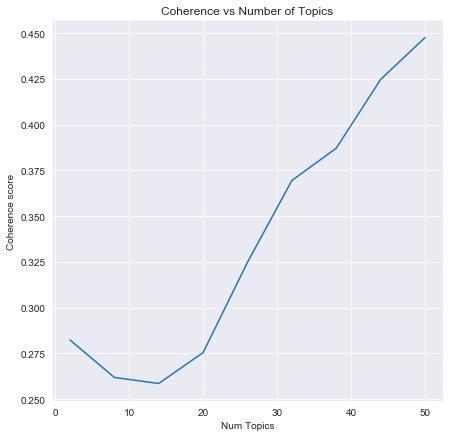

In [114]:
limit=51; start=2; step=6;
x = range(start, limit, step)

# Setting the plotting area
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(7,7))
plt.plot(x, coherence_value)

# Labelling the axes
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence vs Number of Topics")
plt.show()

In [115]:
len(coherence_value)

9